

---


### Descripcion del proyecto 
El dataset con el que se debe trabajar el examen se llama “Clientes” y cuenta con información relacionada a los clientes de cierta empresa. El objetivo de la tarea es generar una segmentación de los clientes (Clustering). El dataset cuenta con 5 atributos:


* CustomerID: Identificador del usuario
* Gender: Género
* Age: Edad
* Annual Income (k$): Ingresos anuales del cliente
* Spending Score (1-100): Índice de gastos, va desde el 1 al 100, donde 100 es mayor.
*   Elemento de lista

















## 1. (40 %) Desarrollar un análisis exploratorio al dataset de clientes:

In [ ]:
# Importamos las librerias que se emplearan en el ejercicio:
import plotly.express as px # Libreria la cual nos permite graficar en 3 dimensiones y seccionar los puntos de los graficos en torno a otra variable
# Igualmente la libreria plotly, nos deja mover el grafico de manera que podamos analizarlo de mejor manera y ver entre 2 dimensiones dependiendo de como lo veamos
# Otra cosa que resaltar de esta libreria es que si escoges un punto te dicen los valores que toma el punto de nuestro DataFrame exactos
from sklearn.cluster import KMeans # Libreria la cual nos provee algoritmos de Clustering
import pandas as pd # Libreria que importamos con el fin de procesar los archivos de texto
from sklearn.preprocessing import MinMaxScaler # Libreria que transforma las entidades de nuestro DataFrame escalando cada entidad a un rango determinado (Normalizar)
from matplotlib import pyplot as plt # Importamos matplotlib ya que esta nos deja visualizar varios tipos de graficos
%matplotlib inline 
# Instruccion para que las graficas se incluyan en la pagina y no aparezcan en una ventana aparte
import seaborn as sns # Permite visualizaciones mas interesantes, mezcla funciones con numpy
import numpy as np # Importamos las funciones aritmeticas y algebraicas
pd.options.display.max_rows=150 #Opcion para limitar las filas que se muestran 

### A. Entendimiento, descripción y relación de las variables

In [ ]:
DataFrame  = pd.read_csv('Clientes.csv') # Llamamos a nuestro DataFrame a través de la libreria pandas con la funcion .read_csv, ya que csv será el tipo de archivo que leeremos

In [ ]:
DataFrame.head() # Hacemos una visualizacion de cómo es nuestro DataFrame a través de la funcion .head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
DataFrame.info() # A través de .info llamamos a la informacíon que hay en nuestro DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Descripción técnica de las variables: 

- Base no tiene datos Nulos.
- Existen 2 tipos de datos: Enteros (4 campos) y object (1 campos)
- Son 5 campos (columnas)
- Son 200 registros (filas)
- No es necesario aplicar metodos de casteo, sustitución (media, moda, constante) o eliminación (eliminar fila), ya que no hay valores faltantes o nulos.
- Es posible transformar la columna Gender a una variable binaria, ya que hay 2 opciones en esta, lo cual facilitaria nuestro analisis ya que los modelos no aceptan variables categoricas directamente.

In [ ]:
DataFrame # Aquí llamamos a nuestro DataFrame para obtener una vista previa de este

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
DataFrame.shape  # Devuelve una tupla que representa la dimensionalidad de DataFrame.

(200, 5)


#### Variables traducidas


*   CustomerID = ID Cliente (Variable tipo int)
*   Gender = Genero (Variable tipo object), sin embargo esta la transformamos luego a una variable tipo int binaria
*   Age =  Edad (Variable tipo int)
*   Annual Income(k$) = Ingresos Anuales (Variable tipo int)
*   Spending Score(1-100)% =  Porcentaje de gasto de Anuales(Variable de tipo int, sin embargo es un porcentaje a diferencia de los demás)





### B. Gráficos y Tablas



---



#### Transformacion variable categorica a binaria

In [ ]:
DataFrame['Gender'] = DataFrame['Gender'].replace({"Male": 1, "Female": 0})
# Luego de observar la columna Gender visualizamos que esta podría ser reemplazada por una variable binaria ya que solamente hay 2 opciones en esta, por lo tanto
# Definiremos Male como 1 y Female como 0 , ocupando la funcíon replace a través de la libreria pandas, esto nos permitira analizar de mejor manera el modelo
DataFrame # Llamamos a nuestro DataFrame para ver como queda finalmente

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#### Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd44975e80>,
      dtype=object)

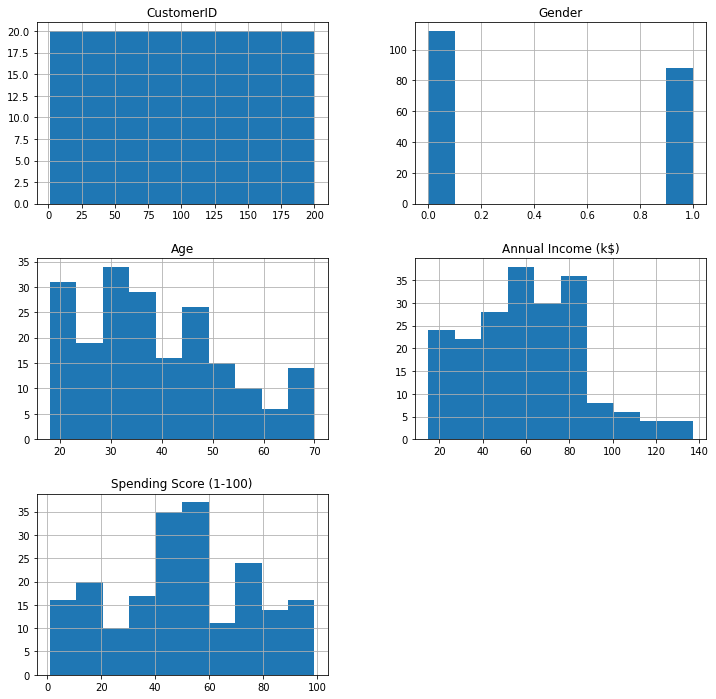

In [ ]:
DataFrame.hist(figsize=(12,12)) # Llamamos a todos los graficos de histograma del DataFame a través de .hist con el tamaño de 12x12 de cada uno de los graficos

In [ ]:
DataFrame.describe()
#Arroja valores claves de cada variable o campo como promedio, cantidad de registros,. porcentil 25%, procentiñl 50%

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Gracias a estos histogramas y además de la descripción de los datos, podemos tener un conocimiento general de la muestra con la cual trabajare. De aqui:
Hay más mujeres que hombres, pero el promedio entregado por la tabla es de 0.44, por lo que podemos decir que no hay tanta diferencia, ya que no esta tan alejado de 0.5.

Pero por otra parte, podemos notar una diferencia entre las distancias de edades, no como en el genero, ya que la desviacion estandar aumento un 93%, y asi podemos definir un rango etario:
*   Adulto-joven: desde 18 hasta 36 años
*   Adulto: desde 36 hasta 54 años
*   Edad avanzada: desde 54 hasta 70 años
También de aquí, podemos decir que la edad del grupo de personas, se concentra más entre los menores de 50 años, ya que el percentil 75 nos indica son iguales o menores a 49 años además de considerar que el promedio de edad es de 38.85. 

Por las mismas razones del punto anterior, podemos definir grupos de ingresos: 
*   Bajo: desde 15k hasta 55k
*   Medio: desde 55k hasta 97k
*   Alto: desde 97k hasta 137k

Y ya que el percentil 75 recibe menor o igual a 78k, la mayoria pertenece a los individuos con un ingreso medio-bajo.

Como último punto, como en el anterior, podemos definir tipos de gastos:
* Bajo: desde 0 hasta 40
* Medio: desde 40 hasta 60
* Alto: desde 60 hasta 100

Y ya que el promedio tiene un valor de 50.20, podemos decir que la muestra tiene un gasto medio.

(Para las elecciones me fije en dos parametros, los intervalos son similares o donde hay más concentración de datos.)

#### Matriz de correlacion

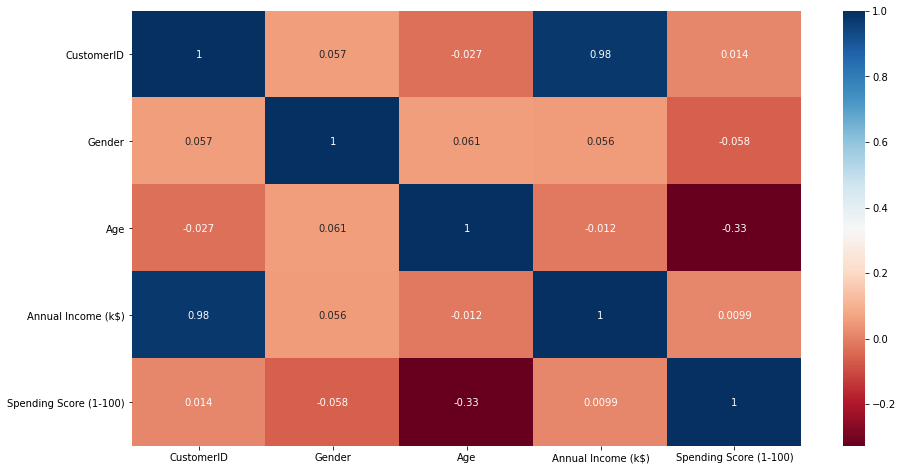

In [ ]:
#Se crea matriz de correlación que complementa a la de PANDAS, ya que está muestra el valor de la correlación, usando coef. de pearson
plt.figure(figsize=(15,8)) #Se define el tamaño de cuadro
sns.heatmap(DataFrame.corr(), annot=True, cmap='RdBu') # dibuja el mapa de correlación en función de la base de DataFrame.corr
plt.show() #Imprimimos nuestra matriz

En esta ocasión, la matriz de correlación no me será relevante en mi análisis, porque más que importarme la relación entre como aumentan o disminuyen las variables, me interesa más la distancia entre ellas. Un ejemplo, sí se tiene altos ingresos, no necesariamente debe haber una relación entre cuanto se gasta o no se gasta.

#### Grafico Scatter en 3 dimensiones

In [ ]:
fig = px.scatter_3d(DataFrame, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Gender')
# Llamamos a la funcion px.scatter_3d de la libreria plotly.express, con la cual haremos una grafica en 3 dimensiones donde:#
# El eje x será "Age", el eje y "Annual Income (k$)" y el eje z "Spending Score (1-100)"
# Y el color lo definiremos en torno a nuestra variable "Gender" la cual tendremos solo 2 colores ya que esta es una variable binario
# De esta manera tendremos a todos nuestros datos en el grafico
fig.show() # Llamamos a nuestra figura a través de .show()



A partir de este grafico empezamos a analizar nuestros datos, ya que podemos interactuar con este grafico moviendo los ejes, tambien es posible alejarnos y acercarnos.

Empece a ver los graficos entre solo 2 ejes de la siguiente manera(Imagenes de ejemplo como iba viendo los ejes):
![Spending Score v/s Annual Income](https://i.imgur.com/aGa2Q9L.png)
![Spending Score v/s Age](https://i.imgur.com/Aq0jnH1.png)
![Annual Income v/s Age](https://i.imgur.com/p9wmGaI.png)



Para finalizar nuestro análisis tridimensional, podemos darnos una idea inicial de que tanto la edad como el género pueden no ser importantes, más bien, confunden visualmente, e incluso si no lo hubiera hecho por colores, agregariamos una dimensión más, por lo que no seríamos capaces de verlo gráficamente. Aquí se abre una nueva oportunidad de análisis, para poder afirmar lo dicho, podemos graficar los diferentes planos en dos dimensiones.

#### Graficos Scatter 2D  y Tablas

##### Annual Income v/s Age

Text(0, 0.5, 'Annual Income (k$)')

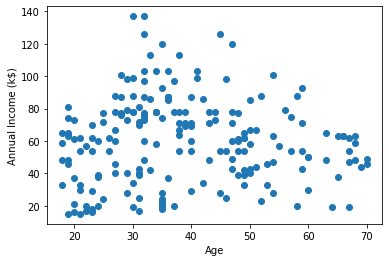

In [ ]:
plt.scatter(DataFrame.Age,DataFrame['Annual Income (k$)']) # A través de la libreria matplotlib llamamos a nuestras columnas "Age" y "Annual Income (k$)" para hacer un grafico .scatter
plt.xlabel('Age') # Definimos nuestro eje x como "Age"
plt.ylabel('Annual Income (k$)') # Definimos nuestro eje y como "Annual Income (k$)"


Se puede ver que en general existe muy poca diferencia entre las personas que tienen distintas edades a la hora de recibir ingresos. Claramente hay casos excepcionales donde se gana más dinero entre los 30 y 50, pero en general a simple vista, en todas las edades se reciben casi lo mismo, y no se puede ver clusters bien definidos. Entonces podemos pensar que la edad no tiene que ver con cuanto ingreso recibe la persona, lo cual concretaré viendo información en tablas.


In [ ]:
#### Llamamos a la funcion .pivot_table, y haremos nuestra tabla pivot con index como Age, con los valores de la columna Annual Income, y como aggfunc pondremos el promedio
pivot_DataFrame_AvA = DataFrame.pivot_table(index=['Age'], values='Annual Income (k$)', aggfunc='mean') 
#LLamamos a nuestro pivot con .head() para que no salgan tantos datos, ver que está ordenado por edades y con sus respectivos promedios
pivot_DataFrame_AvA.head()

,Annual Income (k$)
Age,
18,51.250000
19,57.000000
20,41.600000
21,38.800000
22,31.333333


In [ ]:
pivot_DataFrame_AvA.describe()
#Arroja valores claves de cada variable o campo como promedio, cantidad de registros,. porcentil 25%, procentiñl 50%
#Ocuparemos esto para ver como están distribuidos los promedios de Annual Income (k$) en torno a las edades(Las cuales están en orden de menor a mayor)

,Annual Income (k$)
count,51.000000
mean,59.321889
std,15.421103
min,19.000000
25%,49.437500
50%,58.200000
75%,67.500000
max,101.000000


Tenemos que la menor edad es 18 y la mayor es 70, y considerando que las edades están ordenadas de menor a mayor, tenemos un rango de 52 entonces el 75% del, tiene un valor de 39 (52 x 0.75) entonces la edad correspondiente es 52(39 + 18) tiene un ingreso menor o igual de 67.5k$.Por lo tanto pertenecerían a las personas con ingreso medio o menor según mi clasificación.

Igualmente viendo la desviación estándar podemos decir que está alejada un 30,842%(15.421 x 100 / 50) respecto a la media por lo que debería de ser considerado un valor importante.




In [ ]:
rango_18_36 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 18-36
rango_37_53 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 37-53
rango_54_70 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 54-70

# A través de un ciclo for iremos recorriendo las filas y columnas de mi pivot con el fin de obtener la suma de los promedios
# en los rangos definidos para luego sacar sus respectivos promedios

for index, row in pivot_DataFrame_AvA.iterrows(): # Desempaqueto las filas y columnas de mi pivot a través de .iterrows()
  if index in range(18,37): # Si es que la fila (Age) está entre el rango de [18,...,36] sumamos al contador el valor de su columna 
    rango_18_36 += (row['Annual Income (k$)'])
  elif index in range(37,54):# Si es que la fila (Age) está entre el rango de [36,...,54] sumamos al contador el valor de su columna
    rango_37_53 += (row['Annual Income (k$)'])
  elif index in range(54,71):# Si es que la fila (Age) está entre el rango de [54,...,71] sumamos al contador el valor de su columna
    rango_54_70 += (row['Annual Income (k$)'])
# Sacamos el promedio entre los rangos que definimos diviendolos por la diferencia entre los limites de sus rangos, ya qué será el total de edades en ese rango por así decirlo
promedio_18_36 = rango_18_30 / (36-18)
promedio_37_53 = rango_37_53 / (53-37)
promedio_54_70 = rango_54_70 / (70-54)
# Creamos un DataFrame a través de la librería pandas, donde definiremos 2 columnas 'Rango edad' y 'Promedio por rango', e incluiremos los respectivos valores que obtuvimos
df_promedios_edad = pd.DataFrame({'Rangos edad': ['18-36', '37-53', '54-70'], 'Promedio por rango Annual Income (k$)': [promedio_18_30, promedio_31_50, promedio_51_70]})
df_promedios_edad #Llamamos a nuestro DataFrame creado para interpretar los datos

,Rangos edad,Promedio por rango Annual Income (k$)
0,18-36,58.713294
1,37-53,71.834569
2,54-70,47.800000


Podemos ver que entre los rangos de edades que definimos hay un leve cambio entre los promedios de estos, sin embargo creo que no llega a ser significativo pero para salir de la duda tomaremos en cuenta esta variable más adelante en los modelos Cluster.

##### Annual Income v/s Gender

Text(0, 0.5, 'Annual Income (k$)')

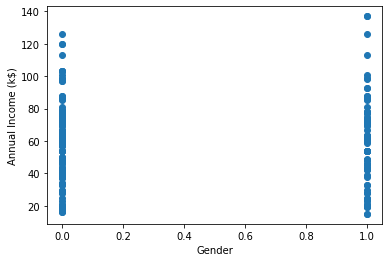

In [ ]:
plt.scatter(DataFrame['Gender'],DataFrame['Annual Income (k$)'])# A través de la libreria matplotlib llamamos a nuestras columnas "Gender" y "Annual Income (k$)" para hacer un gráfico .scatter
plt.xlabel('Gender') # Definimos nuestro eje x como "Gender"
plt.ylabel('Annual Income (k$)') # Definimos nuestro eje y como "Annual Income (k$)"

De este gráfico también podemos pensar que independiente del genero, no se puede ver una gran diferencia entre los ingresos que reciben, sin embargo tenemos que tomar en cuenta tambien que no es muy visible la separación de los puntos por lo que concretaré esto en tablas.

Igualmente podemos ver que no se pueden ver Clusters bien definidos, claro es visible los grupos entre Hombres y Mujeres, sin embargo sería absurdo hacer un Clusters de estos ya que tenemos estos datos en nuestro DataFrame visibles.

In [ ]:
#### Llamamos a la funcion .pivot_table, y haremos nuestra tabla pivot con index como Gender, con los valores de la columna Annual Income, y como aggfunc pondremos el promedio
pivot_DataFrame_AvA = DataFrame.pivot_table(index=['Gender'], values='Annual Income (k$)', aggfunc='mean')
#LLamamos a nuestro para ver que está ordenado por Genero y con sus respectivos promedios e interpretarlos
pivot_DataFrame_AvA

,Annual Income (k$)
Gender,
0,59.250000
1,62.227273


Aquí podemos ver claramente lo que dije anteriormente, los promedios de ingresos anuales por generos varían poco, especificamente 2.45% ((62.23-59.25)/(62.23+59.25)*100) por lo que no tomaremos en cuenta al genero como variable significativa

##### Spending Score v/s Gender

Text(0, 0.5, 'Spending Score (1-100)')

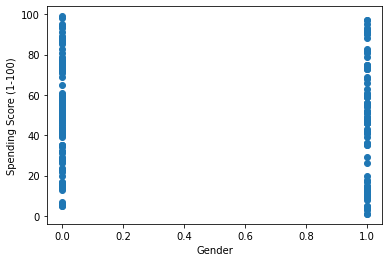

In [ ]:
plt.scatter(DataFrame['Gender'],DataFrame['Spending Score (1-100)'])# A través de la libreria matplotlib llamamos a nuestras columnas "Gender" y "Spending Score (1-100)" para hacer un gráfico .scatter
plt.xlabel('Gender') # Definimos "Gender" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y

De este gráfico también podemos pensar que independiente del genero, no se puede ver una gran diferencia respecto al porcentaje de gato, sin embargo tenemos que tomar en cuenta tambien que no es muy visible la separación de los puntos por lo que concretaré esto en tablas.

Igualmente podemos ver que no se pueden ver Clusters bien definidos, claro es visible los grupos entre Hombres y Mujeres, sin embargo sería absurdo hacer un Clusters de estos ya que tenemos estos datos en nuestro DataFrame visibles.

In [ ]:
#### Llamamos a la funcion .pivot_table, y haremos nuestra tabla pivot con index como Gender, con los valores de la columna Spending Score, y como aggfunc pondremos el promedio
pivot_DataFrame_AvA = DataFrame.pivot_table(index=['Gender'], values='Spending Score (1-100)', aggfunc='mean')
#LLamamos a nuestro para ver que está ordenado por Genero y con sus respectivos promedios e interpretarlos
pivot_DataFrame_AvA

,Spending Score (1-100)
Gender,
0,51.526786
1,48.511364


Aquí podemos ver claramente lo que dije anteriormente, los promedios de ingresos anuales por generos varían poco, especificamente 3.01% ((51.53-48.51)/(51.53+48.51)*100) por lo que no tomaremos en cuenta al genero como variable significativa

##### Spending Score v/s Age

Text(0, 0.5, 'Spending Score (1-100)')

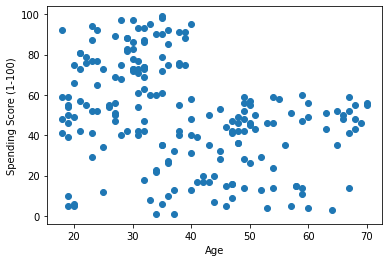

In [ ]:
plt.scatter(DataFrame['Age'],DataFrame['Spending Score (1-100)'])# A través de la libreria matplotlib llamamos a nuestras columnas "Gender" y "Spending Score (1-100)" para hacer un gráfico .scatter
plt.xlabel('Age') # Definimos "Gender" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y

Podemos ver que los datos están muy dispersos, por lo que es difícil definir Cluster a primera vista, pero en general podemos ver que los Adultos-jovenes según mi definición tienen un gasto medio-alto, los adultos y la edad avanzada tienen gasto medio-bajo, por lo que abriremos una posibilidad de un Cluster con un K = 3 separando los Adultos-Jovenes medio-bajo, medio-altos y los de edad avanzada

In [ ]:
#### Llamamos a la funcion .pivot_table, y haremos nuestra tabla pivot con index como Age, con los valores de la columna Spending Score, y como aggfunc pondremos el promedio
pivot_DataFrame_SvA = DataFrame.pivot_table(index=['Age'], values='Spending Score (1-100)', aggfunc='mean')
#LLamamos a nuestro para ver que está ordenado por Age y con sus respectivos promedios e interpretarlos
pivot_DataFrame_SvA.head()

,Spending Score (1-100)
Age,
18,60.00
19,39.75
20,40.20
21,66.80
22,70.00


In [ ]:
pivot_DataFrame_SvA.describe()
#Arroja valores claves de cada variable o campo como promedio, cantidad de registros,. porcentil 25%, procentiñl 50%
#Ocuparemos esto para ver como están distribuidos los promedios de 	Spending Score (1-100) en torno a las edades(Las cuales están en orden de menor a mayor)

,Spending Score (1-100)
count,51.000000
mean,45.548965
std,18.661743
min,3.000000
25%,34.500000
50%,45.800000
75%,60.166667
max,84.666667


Tenemos que la menor edad es 18 y la mayor es 70, y considerando que las edades están ordenadas de menor a mayor, tenemos un rango de 52 entonces el 75% del, tiene un valor de 39 (52 x 0.75) entonces la edad correspondiente es 52(39 + 18) tiene un porcentaje de gasto menor o igual de 60.17%.Por lo tanto pertenecerían a las personas con porcentaje de gasto medio o menor según mi clasificación.

Igualmente viendo la desviación estándar podemos decir que está alejada un 40,1%(15.421 x 100 / 50)aproximadamente respecto a la media por lo que debería de ser considerado un valor importante.

In [ ]:
rango_18_36 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 18-36
rango_37_53 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 37-53
rango_54_70 = 0 # Creamos un contador donde iré sumando los promedios entre los rangos 54-70

# A través de un ciclo for iremos recorriendo las filas y columnas de mi pivot con el fin de obtener la suma de los promedios
# en los rangos definidos para luego sacar sus respectivos promedios

for index, row in pivot_DataFrame_SvA.iterrows():# Desempaqueto las filas y columnas de mi pivot a través de .iterrows()
  if index in range(18,37): # Si es que la fila (Age) está entre el rango de [18,...,36] sumamos al contador el valor de su columna 
    rango_18_36 += (row['Spending Score (1-100)'])
  elif index in range(37,54): # Si es que la fila (Age) está entre el rango de [37,...,53] sumamos al contador el valor de su columna 
    rango_37_53 += (row['Spending Score (1-100)'])
  elif index in range(54,71): # Si es que la fila (Age) está entre el rango de [54,...,70] sumamos al contador el valor de su columna 
    rango_54_70 += (row['Spending Score (1-100)'])

# Sacamos el promedio entre los rangos que definimos diviendolos por la diferencia entre los limites de sus rangos, ya qué será el total de edades en ese rango por así decirlo

promedio_18_36 = rango_18_30 / (36-18)
promedio_37_53 = rango_37_53 / (53-37)
promedio_54_70 = rango_54_70 / (70-54)

# Creamos un DataFrame a través de la librería pandas, donde definiremos 2 columnas 'Rango edad' y 'Promedio por rango', e incluiremos los respectivos valores que obtuvimos

df_promedios_edad = pd.DataFrame({'Rangos edad': ['18-36', '37-53', '54-70'], 'Promedio por rango Spending Score (1-100)': [promedio_18_30, promedio_31_50, promedio_51_70]})
df_promedios_edad #Llamamos a nuestro DataFrame creado para interpretar los datos

,Rangos edad,Promedio por rango Spending Score (1-100)
0,18-36,58.713294
1,37-53,71.834569
2,54-70,47.800000


Podemos ver que entre los rangos de edades que definimos hay un leve cambio entre los promedios de estos, sin embargo creo que no llega a ser significativo pero para salir de la duda tomaremos en cuenta esta variable más adelante en los modelos Cluster.

##### Spending Score v/s Annual Income

Text(0, 0.5, 'Spending Score (1-100)')

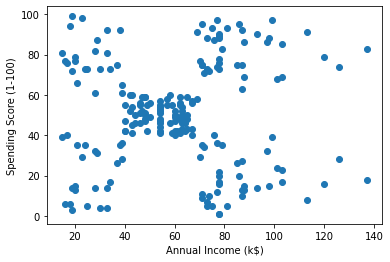

In [ ]:
plt.scatter(DataFrame['Annual Income (k$)'],DataFrame['Spending Score (1-100)'])# A través de la libreria matplotlib llamamos a nuestras columnas "Annual Income (k$)" y "Spending Score (1-100)" para hacer un gráfico .scatter
plt.xlabel('Annual Income (k$)') # Definimos "Annual Income (k$)" como eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como eje y 

Y en este gráfico **sí** puede verse una gran diferencia con los anteriores, pues podemos ver concentraciones de puntos a lo largo de los ejes, y al existir estos, podemos encontar posibles combinaciones de clusters, por ejemplo 5.

In [ ]:
#### Llamamos a la funcion .pivot_table, y haremos nuestra tabla pivot con index como Spending Score (1-100), con los valores de la columna Annual Income (k$), y como aggfunc pondremos el promedio
pivot_DataFrame_SSvAI = DataFrame.pivot_table(index=['Spending Score (1-100)'], values='Annual Income (k$)', aggfunc='mean')
# Aquí elegimos Spending Score ya que sus valores son parte de un porcentaje del 1-100% por lo que tendríamos filas enteras, e igualmente
# si más adelante llamamos a .describe() de este pivot los percentiles serán correspondiente a la fila del porcentaje, por lo que será
# mucho más simple el analisis
pivot_DataFrame_SSvAI.head()  #Llamamos a nuestro pivot creado para interpretar los datos

,Annual Income (k$)
Spending Score (1-100),
1,78.0
3,19.0
4,31.5
5,63.5
6,17.0


In [ ]:
pivot_DataFrame_SSvAI.describe()
#Arroja valores claves de cada variable o campo como promedio, cantidad de registros,. porcentil 25%, procentiñl 50%
#Ocuparemos esto para ver como varía el porcentaje de spending score en torno a los percentiles y ver como es la desviacion estandar respecto
#a la media 

,Annual Income (k$)
count,84.000000
mean,63.518793
std,24.542146
min,17.000000
25%,48.916667
50%,60.750000
75%,78.125000
max,137.000000


Tenemos que nuestras filas corresponden al Spending Score,debido a esto nuestras filas serán valores enteros del 1% al 100%, ordenados de menor a mayor, esto nos facilitará el analisis ya que nuestro percentil 50% corresponderá al 50% de Spending Score, por lo que la gente bajo el 50% de gasto tendrá un ingreso menor o igual al 60k .Por lo que las personas que tengan este porcentaje de gasto o menor pertenecerían a las personas con porcentaje de gasto medio o menor y ingresos medio o menor según mi clasificación.Por lo que podemos decir que la mayoría de los clientes tiende a estar en estos grupos.

Igualmente viendo la desviación estándar podemos decir que está alejada un 38,63%(24.542 x 100 / 63.518)aproximadamente respecto a la media por lo que debería de ser considerado un valor importante.

#### Conclusiones e Hipotesis Graficos - Tablas

Luego de analizar mis gráficos y tablas llegamos a la conclusión que la variable “Gender”, es una variable no relevantes la cual más que entregar información, nos entrega confusión al análisis, por lo que será una variable que omitiré al hacer mis clusters. Igualmente pensamos que la variable "Age" puede llegar a no ser una variable significativa, debido a que sus datos en los gráficos se encuentran demasiados dispersos(no hay grupos Clusters claros), sin embargo como pudimos ver a través de las tablas hay una variacíon de los datos considerable respecto a esta.

Por otra parte nuestras hipótesis en torno a los gráficos es de que nuestras variables significativas serán ‘Spending Score (1-100)’ y ‘Annual Income ($)’. Podemos tomar un valor K-means que puede ser 3, 5 e igualmente probaremos un valor de K-means de 8 para ver como varía si lo aumentamos demasiado, además haremos modelos Cluster en torno a la edad, para ver los resultados de la segmentación y si es que son interpretables los datos.
* Para Annual vs Age ocuparemos K = 4
* Para Spending vs Age ocuparemos K = 3

Ya que estos son los posibles grupos Clusters que vimos en nuestros analisis.



## 2. (60%) Desarrollar modelos de segmentación para el dataset de Clientes. Se espera al menos lo siguiente:

### A. Creación de Clusters e interpretación de estos.

#### Normalizacion
 Lo primero que realizaremos será normalizar nuestros datos ya que estamos trabajando con distancias 

In [ ]:
scaler = MinMaxScaler() # Guardamos la función que nos permitirá normalizar nuestros datos en la variable scaler

# Con scaler.fit ajustamos todos nuestros datos a la escala de normalizacion que definimos con la funcíon .fit a través de la variable scaler y llamando a nuestra columna de interes del DataFrame, de la siguiente manera:
# scaler.fit(DataFrame[[Columna]])
# Luego con scaler.transform, guardamos nuestras variables ya normalizadas en el DataFrame a través de comandos con la librería Pandas de la siguiente manera:
# DataFrame[Columna] = scaler.transform(DataFrame[[Columna]])
scaler.fit(DataFrame[['Gender']])
DataFrame['Gender'] = scaler.transform(DataFrame[['Gender']])
scaler.fit(DataFrame[['Age']])
DataFrame['Age'] = scaler.transform(DataFrame[['Age']])
scaler.fit(DataFrame[['Annual Income (k$)']])
DataFrame['Annual Income (k$)'] = scaler.transform(DataFrame[['Annual Income (k$)']])
scaler.fit(DataFrame[['Spending Score (1-100)']])
DataFrame['Spending Score (1-100)'] = scaler.transform(DataFrame[['Spending Score (1-100)']])


In [ ]:
DataFrame # Llamamos a nuestro DataFrame para verificar si los datos están guardados como normalizados

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,0.019231,0.000000,0.387755
1,2,1.0,0.057692,0.000000,0.816327
2,3,0.0,0.038462,0.008197,0.051020
3,4,0.0,0.096154,0.008197,0.775510
4,5,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,0.0,0.326923,0.860656,0.795918
196,197,0.0,0.519231,0.909836,0.275510
197,198,1.0,0.269231,0.909836,0.744898
198,199,1.0,0.269231,1.000000,0.173469


#### Clusters

##### Cluster K = 3  Age & Spending Score

In [ ]:
#Tenemos que tomar en cuenta que el modelo ya se encuentra normalizado

km = KMeans(n_clusters=3,n_init=10) # Guardamos el modelo K Means en nuestra variable km, donde elegimos un K = 3 y un n_init = 10 ya que nuestro DataFrame cuenta solamente con 200 filas por lo que no necesitaremos un n_init más pequeño(Ya que contamos con un "buen computador")  y tampoco un n_init tan grande, porque los 5 conjuntos están bien definidos.

#Ajustamos y predecimos, todo con el comando fit_predict
y_predicted = km.fit_predict(DataFrame[['Spending Score (1-100)','Age']]) # # Guardamos nuestros centro de cluster y predicciones de indice de cluster para nuestras variables en y_predicted

#Visualizamos los cluster creados
y_predicted


array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
DataFrame['cluster']=y_predicted # Añadimos los indices de clusters que predecimos a nuestro DataFrame como la columna "Clusters"
DataFrame.head()# Llamamos a nuestro DataFrame para visualizar como queda al agregar nuestros indices de clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,0.387755,2
1,2,1.0,0.057692,0.000000,0.816327,0
2,3,0.0,0.038462,0.008197,0.051020,2
3,4,0.0,0.096154,0.008197,0.775510,0
4,5,0.0,0.250000,0.016393,0.397959,2


In [ ]:
# A través de .cluster_centers llamamos a nuestro modelo que guardamos en la variable "km" y le pedimos que nos muestra las coordenadas(X,Y) de estos
km.cluster_centers_ 

array([[0.73961585, 0.20565611],
       [0.40108624, 0.7323201 ],
       [0.23912206, 0.32656023]])

De aquí podemos interpretar que nuestros clusters center están bien definidos ya que el número de puntos es igual al valor de K-means que le asignamos a este ajuste(3)

In [ ]:
# Número de iteraciones que corrió el modelo hasta llegar al óptimo
km.n_iter_

9

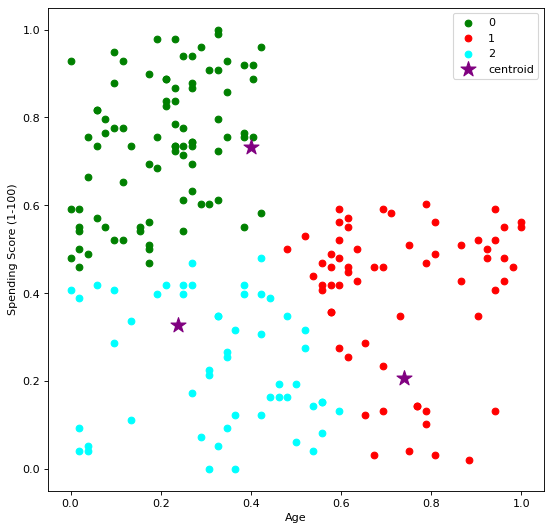

In [ ]:
#Guardamos cada Cluster en un DataFrame por separado de la manera:
# dfx = DataFrame[DataFrame.cluster==x]
df1 = DataFrame[DataFrame.cluster==0]
df2 = DataFrame[DataFrame.cluster==1]
df3 = DataFrame[DataFrame.cluster==2]



plt.figure(figsize=(8, 8), dpi=80) # Creamos una figura para visualizar los puntos

# Graficamos cada uno de los DataFrame creados anteriormente con la función de dispersion plt.scatter y le asignamos un color a cada uno, de la siguiente manera:
# plt.scatter(dfx[Columna1], dfx[Columna2], color = 'color', label = 'x' )

plt.scatter(df1['Age'],df1['Spending Score (1-100)'],color='green', label='0')
plt.scatter(df2['Age'],df2['Spending Score (1-100)'],color='red', label='1')
plt.scatter(df3['Age'],df3['Spending Score (1-100)'],color='cyan', label='2')

# Incoporamos a nuestro gráfico a partir de la misma función de dispersion anterior los cluster centers que llamamos anteriormente
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', s=200)

plt.xlabel('Age') # Definimos "Age" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y

# Llamamos a nuestra leyenda(gráfico)
plt.legend()

In [ ]:
#SSE
km.inertia_ 

8.742042168276534

###### Interpretación
**Pondré una imagen de los Cluster que visualizé  con el fin de no confundir los colores y dar una mejor interpretación**

![Spending vs Age](https://i.imgur.com/2RUUPxU.png)

Por un lado tenemos la edad y el gasto porcentual, podríamos definir 3 pero con errores que nos anticipan que este iteración no nos servirá, ya que el conjunto formado por los jóvenes-adultos que tienen un gasto bajo, también contiene a los adultos, por lo que la clasificación sería incoherente.

##### Cluster K = 4 Age & Annual Income

In [ ]:
#Tenemos que tomar en cuenta que el modelo ya se encuentra normalizado

km = KMeans(n_clusters=4,n_init=10) # Guardamos el modelo K Means en nuestra variable km, donde elegimos un K = 4 y un n_init = 10 ya que nuestro DataFrame cuenta solamente con 200 filas por lo que no necesitaremos un n_init más pequeño(Ya que contamos con un "buen computador")  y tampoco un n_init tan grande, porque los 5 conjuntos están bien definidos.

#Ajustamos y predecimos, todo con el comando fit_predict
y_predicted = km.fit_predict(DataFrame[['Age','Annual Income (k$)']]) # # Guardamos nuestros centro de cluster y predicciones de indice de cluster para nuestras variables en y_predicted

#Visualizamos los cluster creados
y_predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
DataFrame['cluster']=y_predicted # Añadimos los indices de clusters que predecimos a nuestro DataFrame como la columna "Clusters"
DataFrame.head()# Llamamos a nuestro DataFrame para visualizar como queda al agregar nuestros indices de clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,0.387755,0
1,2,1.0,0.057692,0.000000,0.816327,0
2,3,0.0,0.038462,0.008197,0.051020,0
3,4,0.0,0.096154,0.008197,0.775510,0
4,5,0.0,0.250000,0.016393,0.397959,0


In [ ]:
# A través de .cluster_centers llamamos a nuestro modelo que guardamos en la variable "km" y le pedimos que nos muestra las coordenadas(X,Y) de estos
km.cluster_centers_ 

array([[0.19567308, 0.10963115],
       [0.38663968, 0.60497555],
       [0.72982346, 0.29427573],
       [0.13827839, 0.42544887]])

De aquí podemos interpretar que nuestros clusters center están bien definidos ya que el número de puntos es igual al valor de K-means que le asignamos a este ajuste(4)

In [ ]:
# Número de iteraciones que corrió el modelo hasta llegar al óptimo
km.n_iter_

7

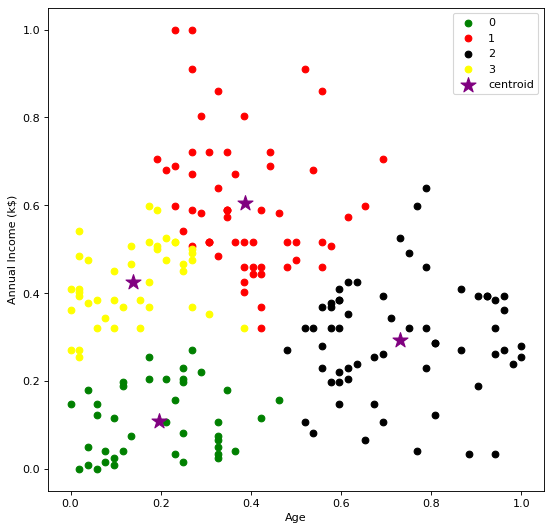

In [ ]:
#Guardamos cada Cluster en un DataFrame por separado de la manera:
# dfx = DataFrame[DataFrame.cluster==x]
df1 = DataFrame[DataFrame.cluster==0]
df2 = DataFrame[DataFrame.cluster==1]
df3 = DataFrame[DataFrame.cluster==2]
df4 = DataFrame[DataFrame.cluster==3]

plt.figure(figsize=(8, 8), dpi=80) # Creamos una figura para visualizar los puntos

# Graficamos cada uno de los DataFrame creados anteriormente con la función de dispersion plt.scatter y le asignamos un color a cada uno, de la siguiente manera:
# plt.scatter(dfx[Columna1], dfx[Columna2], color = 'color', label = 'x' )
plt.scatter(df1['Age'],df1['Annual Income (k$)'],color='green', label='0')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],color='red', label='1')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],color='black', label='2')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],color='yellow', label='3')


# Incoporamos a nuestro gráfico a partir de la misma función de dispersion anterior los cluster centers que llamamos anteriormente
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', s=200)

plt.xlabel('Age') # Definimos "Age" como nuestro eje x
plt.ylabel('Annual Income (k$)') # Definimos "Annual Income (k$)" como nuestro eje y

# Llamamos a nuestra leyenda(gráfico)
plt.legend()

In [ ]:
#SSE
km.inertia_ 

6.055824667599625

En esta distribución de los clusterings, la distancia a los centros de masas es bastante grande, de hecho esperaba que se generaran grupos de altos gastos, gastos medios y gastos bajos, pero en esta configuración, no se puede definir un grupo similar, y que sean distintos entre si. Por ejemplo, en el cluster verde, podriamos definir a los que gastan mucho y ganan poco, pero también en ese mismo grupo hay varios que ganan poco y tienen un gasto medio, lo que nos llevaria a una contradicción.

###### Interpretación
**Pondré una imagen de los Cluster que visualizé  con el fin de no confundir los colores y dar una mejor interpretación**

![Annual vs Age](https://i.imgur.com/1VFP8Dk.png)

En esta ocasión tenemos la edad y los ingresos anuales, aquí podemos definir 4 grupos más claros, los jóvenes-adultos que reciben poco ingresos(verde), los jóvenes-adultos que tienen un gasto medio(amarillo), los adultos que reciben ingresos medios-altos(rojo) y los que tienen edad avanzada que reciben unos ingresos medios-bajo(negro), pero aún así, como vista general, los clusters están muy próximos, por lo que deberíamos pasar a usar otras herramientas para ver si este modelo es óptimo.

##### Cluster K = 3 Spending Score & Annual Income

In [ ]:
#Tenemos que tomar en cuenta que el modelo ya se encuentra normalizado

km = KMeans(n_clusters=3,n_init=10) # Guardamos el modelo K Means en nuestra variable km, donde elegimos un K = 5 y un n_init = 10 ya que nuestro DataFrame cuenta solamente con 200 filas por lo que no necesitaremos un n_init más pequeño(Ya que contamos con un "buen computador")  y tampoco un n_init tan grande, porque los 5 conjuntos están bien definidos.

#Ajustamos y predecimos, todo con el comando fit_predict
y_predicted = km.fit_predict(DataFrame[['Annual Income (k$)','Spending Score (1-100)']]) # # Guardamos nuestros centro de cluster y predicciones de indice de cluster para nuestras variables en y_predicted

#Visualizamos los cluster creados
y_predicted


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
DataFrame['cluster']=y_predicted # Añadimos los indices de clusters que predecimos a nuestro DataFrame como la columna "Clusters"
DataFrame.head()# Llamamos a nuestro DataFrame para visualizar como queda al agregar nuestros indices de clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,0.387755,0
1,2,1.0,0.057692,0.000000,0.816327,0
2,3,0.0,0.038462,0.008197,0.051020,1
3,4,0.0,0.096154,0.008197,0.775510,0
4,5,0.0,0.250000,0.016393,0.397959,0


In [ ]:
# A través de .cluster_centers llamamos a nuestro modelo que guardamos en la variable "km" y le pedimos que nos muestra las coordenadas(X,Y) de estos
km.cluster_centers_ 

array([[0.25631369, 0.5426549 ],
       [0.46737705, 0.1577551 ],
       [0.58638083, 0.82783883]])

De aquí podemos interpretar que nuestros clusters center están bien definidos ya que el número de puntos es igual al valor de K-means que le asignamos a este ajuste(3)

In [ ]:
# Número de iteraciones que corrió el modelo hasta llegar al óptimo
km.n_iter_

8

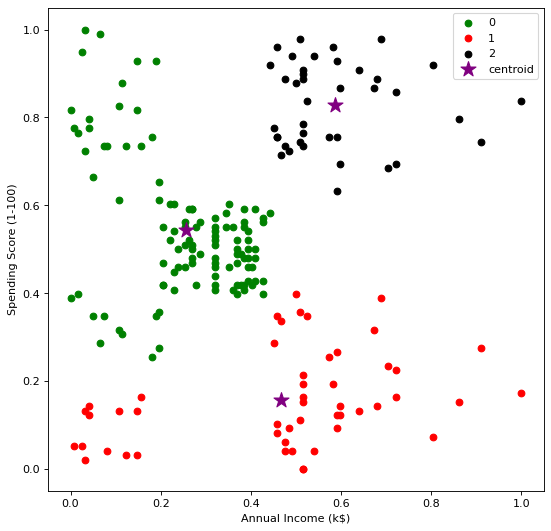

In [ ]:
#Guardamos cada Cluster en un DataFrame por separado de la manera:
# dfx = DataFrame[DataFrame.cluster==x]
df1 = DataFrame[DataFrame.cluster==0]
df2 = DataFrame[DataFrame.cluster==1]
df3 = DataFrame[DataFrame.cluster==2]

plt.figure(figsize=(8, 8), dpi=80) # Creamos una figura para visualizar los puntos

# Graficamos cada uno de los DataFrame creados anteriormente con la función de dispersion plt.scatter y le asignamos un color a cada uno, de la siguiente manera:
# plt.scatter(dfx[Columna1], dfx[Columna2], color = 'color', label = 'x' )
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red', label='1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black', label='2')


# Incoporamos a nuestro gráfico a partir de la misma función de dispersion anterior los cluster centers que llamamos anteriormente
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', s=200)

plt.xlabel('Annual Income (k$)') # Definimos "Annual Income (k$)" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y

# Llamamos a nuestra leyenda(gráfico)
plt.legend()

In [ ]:
#SSE
km.inertia_ 

9.058985215159453

###### Interpretación
**Pondré una imagen de los Cluster que visualizé  con el fin de no confundir los colores y dar una mejor interpretación**

![Spending vs Anual K3](https://i.imgur.com/W2wt1qw.png)

En esta distribución de los clusterings, la distancia a los centros de masas es bastante grande, de hecho esperaba que se generaran grupos de altos gastos, gastos medios y gastos bajos, pero en esta configuración, no se puede definir un grupo similar, y que sean distintos entre si. Por ejemplo, en el cluster verde, podriamos definir a los que gastan mucho y ganan poco, pero también en ese mismo grupo hay varios que ganan poco y tienen un gasto medio, lo que nos llevaria a una contradicción.

##### Cluster K = 5 Spending Score & Annual Income

In [ ]:
km = KMeans(n_clusters=5,n_init=10) # Guardamos el modelo K Means en nuestra variable km, donde elegimos un K = 5 y un n_init = 10 ya que nuestro DataFrame cuenta solamente con 200 filas por lo que no necesitaremos un n_init más pequeño(Ya que contamos con un "buen computador")  y tampoco un n_init tan grande, porque los 5 conjuntos están bien definidos.
#Ajustamos y predecimos, todo con el comando fit_predict
y_predicted = km.fit_predict(DataFrame[['Annual Income (k$)','Spending Score (1-100)']]) # Guardamos nuestros centro de cluster y predicciones de indice de cluster para nuestras variables en y_predicted
y_predicted # Llamamos a y_predicted para visualizar como fueron predecidos los indices de clusters


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
DataFrame['cluster']=y_predicted # Añadimos los indices de clusters que predecimos a nuestro DataFrame como la columna "Clusters"
DataFrame # Llamamos a nuestro DataFrame para visualizar como queda al agregar nuestros indices de clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,0.387755,4
1,2,1.0,0.057692,0.000000,0.816327,3
2,3,0.0,0.038462,0.008197,0.051020,4
3,4,0.0,0.096154,0.008197,0.775510,3
4,5,0.0,0.250000,0.016393,0.397959,4
...,...,...,...,...,...,...
195,196,0.0,0.326923,0.860656,0.795918,0
196,197,0.0,0.519231,0.909836,0.275510,2
197,198,1.0,0.269231,0.909836,0.744898,0
198,199,1.0,0.269231,1.000000,0.173469,2


In [ ]:
km.cluster_centers_ # A través de .cluster_centers llamamos a nuestro modelo que guardamos en la variable "km" y le pedimos que nos muestra las coordenadas(X,Y) de estos

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

De aquí podemos interpretar que nuestros clusters center están bien definidos ya que el número de puntos es igual al valor de K-means que le asignamos a este ajuste(5)

In [ ]:
# Número de iteraciones que corrió el modelo hasta llegar al óptimo
km.n_iter_

4

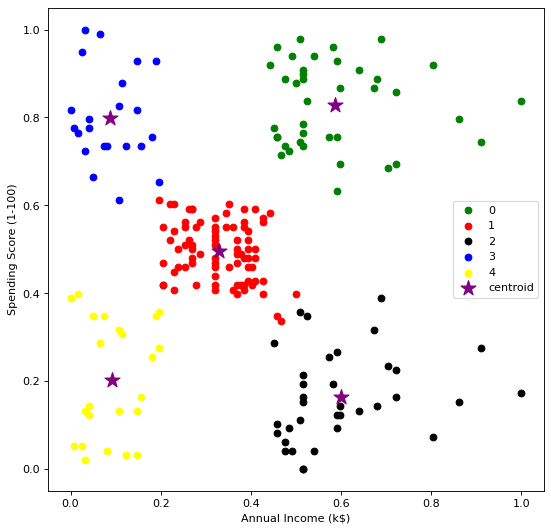

In [ ]:
#Guardamos cada Cluster en un DataFrame por separado de la manera:
# dfx = DataFrame[DataFrame.cluster==x]
df1 = DataFrame[DataFrame.cluster==0]
df2 = DataFrame[DataFrame.cluster==1]
df3 = DataFrame[DataFrame.cluster==2]
df4 = DataFrame[DataFrame.cluster==3]
df5 = DataFrame[DataFrame.cluster==4]

plt.figure(figsize=(8, 8), dpi=80) # Creamos una figura para visualizar los puntos

# Graficamos cada uno de los DataFrame creados anteriormente con la función de dispersion plt.scatter y le asignamos un color a cada uno, de la siguiente manera:
# plt.scatter(dfx[Columna1], dfx[Columna2], color = 'color', label = 'x' )
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red', label='1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black', label='2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue', label='3')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow', label='4')

# Incoporamos a nuestro gráfico a partir de la misma función de dispersion anterior los cluster centers que llamamos anteriormente
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', s=200)

plt.xlabel('Annual Income (k$)') # Definimos "Annual Income (k$)" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y
plt.legend() # Llamamos a nuestra leyenda(gráfico)

In [ ]:
#SSE
km.inertia_ 

3.5831179059525606

###### Interpretación
**Pondré una imagen de los Cluster que visualizé  con el fin de no confundir los colores y dar una mejor interpretación**

![Spending vs Annual K5](https://i.imgur.com/4tvSp96.png)

En esta configuración, se tiene un error más bajo, y podemos definir 5 grupos similares entre sí y que son diferentes a los demas:
* Cluster amarillo : Clientes con bajos ingresos anuales y pocos porcentaje de gasto 
* Cluster negro : Clientes con bajos ingresos anuales y bajos porcentaje de gasto 
* Cluster verde : Clientes con un ingreso anual alto y porcentaje de gasto  alto
* Cluster azul : Clientes con pocos ingresos anuales y altos porcentaje de gasto 
* Cluster rojo : Clientes con medios ingresos anuales y medios porcentaje de gasto 

##### Cluster K = 8 Spending Score & Annual Income

In [ ]:
#Tenemos que tomar en cuenta que el modelo ya se encuentra normalizado

km = KMeans(n_clusters=8,n_init=10) # Guardamos el modelo K Means en nuestra variable km, donde elegimos un K = 5 y un n_init = 10 ya que nuestro DataFrame cuenta solamente con 200 filas por lo que no necesitaremos un n_init más pequeño(Ya que contamos con un "buen computador")  y tampoco un n_init tan grande, porque los 5 conjuntos están bien definidos.

#Ajustamos y predecimos, todo con el comando fit_predict
y_predicted = km.fit_predict(DataFrame[['Annual Income (k$)','Spending Score (1-100)']]) # # Guardamos nuestros centro de cluster y predicciones de indice de cluster para nuestras variables en y_predicted

#Visualizamos los cluster creados
y_predicted


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 7, 0, 0, 7, 7, 0, 7, 0, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 6, 2, 7, 2, 6, 2, 6, 2,
       7, 2, 6, 2, 6, 2, 6, 2, 6, 2, 7, 2, 6, 2, 7, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 7, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5], dtype=int32)

In [ ]:
DataFrame['cluster']=y_predicted # Añadimos los indices de clusters que predecimos a nuestro DataFrame como la columna "Clusters"
DataFrame.head() # Llamamos a nuestro DataFrame para visualizar como queda al agregar nuestros indices de clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1.0,0.019231,0.000000,0.387755,3
1,2,1.0,0.057692,0.000000,0.816327,4
2,3,0.0,0.038462,0.008197,0.051020,3
3,4,0.0,0.096154,0.008197,0.775510,4
4,5,0.0,0.250000,0.016393,0.397959,3


In [ ]:
# A través de .cluster_centers llamamos a nuestro modelo que guardamos en la variable "km" y le pedimos que nos muestra las coordenadas(X,Y) de estos
km.cluster_centers_ 

array([[0.25848265, 0.51898434],
       [0.77622951, 0.21428571],
       [0.51668618, 0.82543732],
       [0.08313817, 0.18901846],
       [0.08155738, 0.81632653],
       [0.76378539, 0.83395176],
       [0.53064861, 0.12644188],
       [0.39456036, 0.46498145]])

De aquí podemos interpretar que nuestros clusters center están bien definidos ya que el número de puntos es igual al valor de K-means que le asignamos a este ajuste(8)

In [ ]:
# Número de iteraciones que corrió el modelo hasta llegar al óptimo
km.n_iter_

7

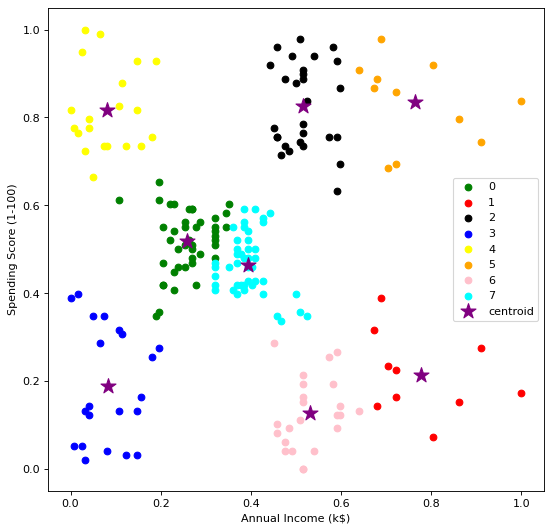

In [ ]:
#Guardamos cada Cluster en un DataFrame por separado de la manera:
# dfx = DataFrame[DataFrame.cluster==x]
df1 = DataFrame[DataFrame.cluster==0]
df2 = DataFrame[DataFrame.cluster==1]
df3 = DataFrame[DataFrame.cluster==2]
df4 = DataFrame[DataFrame.cluster==3]
df5 = DataFrame[DataFrame.cluster==4]
df6 = DataFrame[DataFrame.cluster==5]
df7 = DataFrame[DataFrame.cluster==6]
df8 = DataFrame[DataFrame.cluster==7]

plt.figure(figsize=(8, 8), dpi=80) # Creamos una figura para visualizar los puntos

# Graficamos cada uno de los DataFrame creados anteriormente con la función de dispersion plt.scatter y le asignamos un color a cada uno, de la siguiente manera:
# plt.scatter(dfx[Columna1], dfx[Columna2], color = 'color', label = 'x' )
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red', label='1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black', label='2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue', label='3')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow', label='4')
plt.scatter(df6['Annual Income (k$)'],df6['Spending Score (1-100)'],color='orange', label='5')
plt.scatter(df7['Annual Income (k$)'],df7['Spending Score (1-100)'],color='pink', label='6')
plt.scatter(df8['Annual Income (k$)'],df8['Spending Score (1-100)'],color='cyan', label='7')

# Incoporamos a nuestro gráfico a partir de la misma función de dispersion anterior los cluster centers que llamamos anteriormente
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', s=200)

plt.xlabel('Annual Income (k$)') # Definimos "Annual Income (k$)" como nuestro eje x
plt.ylabel('Spending Score (1-100)') # Definimos "Spending Score (1-100)" como nuestro eje y

plt.legend()# Llamamos a nuestra leyenda(gráfico)

In [ ]:
#SSE
km.inertia_ 

2.218840260984672

###### Interpretación
**Pondré una imagen de los Cluster que visualizé  con el fin de no confundir los colores y dar una mejor interpretación**

![Spending vs Annual K8](https://i.imgur.com/he94khg.png)

En este, tenemos un error aún más bajo, pero nos topamos con un problema similar a cuando tenemos 3 clusters, y es que no se pueden diferenciar los grupos. Por ejemplo, el grupo verde esta compuesto por personas que tienen un gasto medio y un ingreso bajo, pero el grupo cyan también tiene misma definición, por lo que llegariamos a un absurdo.

### B. Validación de modelos y conclusión de ¿qué modelo es mejor?

##### Validacion modelo Spending Score y Age

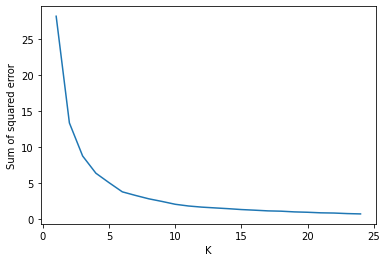

In [ ]:
#Creamos una lista para guardar nuestros valores de SSE para un diferente K
sse = []

#Creamos una lista a través de range, con la cual definiremos los posibles valores de K que estudiaremos
k_rng = range(1,25) # Estudiaremos desde el rango K = 1 hasta el rango K = 25

# Vamos a recorrer el modelo con diferentes valores de K a través de un for que correrá a través del rango definido en k_rng
# El valor que k irá tomando será el que está en cada indice de la lista k_rng
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10) # Guardamos el modelo K Means en nuestra variable km y definimos a n_clusters como k
    km.fit(DataFrame[['Age','Spending Score (1-100)']]) #Ajustamos y predecimos, todo con el comando fit_predict
    sse.append(km.inertia_) #Vamos guardando cada valor de SSE en nuestra lista creada anteriormente

#Veamos como se comportó el modelo en términos de SSE para diferentes K
plt.xlabel('K') # Definimos nuestro eje x como "K"
plt.ylabel('Sum of squared error') # Definimos nuestro eje y como "Sum of squared error"
plt.plot(k_rng,sse) # Ploteamos nuestros valores de k_rng en el eje x y los valores de SSE en el eje y

In [ ]:
sse # Llamamos a nuestro sse para ver los valores exactos que ha tomado

[28.17833784431536,
 13.337690580804237,
 8.742042168276534,
 6.350049379567736,
 5.026143351352525,
 3.7561445337632238,
 3.2557142505630745,
 2.7871158636793187,
 2.4208309597782334,
 2.0265529673523477,
 1.788694922459917,
 1.6317043310361408,
 1.5223860128566709,
 1.4154425506023025,
 1.2926156552009203,
 1.2060972800784868,
 1.1096765177779777,
 1.0670144318950254,
 0.9685329927376587,
 0.91701735275641,
 0.8381464142884896,
 0.8085889702167837,
 0.7321348376573493,
 0.6869157826077992]

Validaré mi modelo a través de un ciclo for, asi que fui viendo cómo afecta el n_cluster al error. Si consideramos la diferencia que se va generando entre los 3 primeros valores de la iteración comparado con las diferencia entre los otros valores que siguen y teniendo en cuenta la dispersión que tienen esos datos, un SSE de 8.7 es bastante aceptable, antes de seguir poniendo más k y que las distintas agrupaciones empiecen a perder el sentido.

##### Validacion modelo Annual y Age

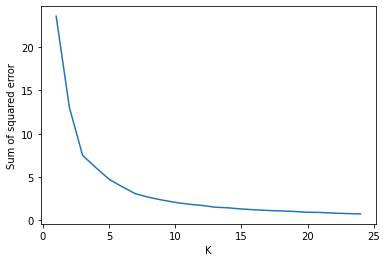

In [ ]:
#Creamos una lista para guardar nuestros valores de SSE para un diferente K
sse = []

#Creamos una lista a través de range, con la cual definiremos los posibles valores de K que estudiaremos
k_rng = range(1,25) # Estudiaremos desde el rango K = 1 hasta el rango K = 25

# Vamos a recorrer el modelo con diferentes valores de K a través de un for que correrá a través del rango definido en k_rng
# El valor que k irá tomando será el que está en cada indice de la lista k_rng
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10) # Guardamos el modelo K Means en nuestra variable km y definimos a n_clusters como k
    km.fit(DataFrame[['Annual Income (k$)','Age']]) #Ajustamos y predecimos, todo con el comando fit_predict
    sse.append(km.inertia_) #Vamos guardando cada valor de SSE en nuestra lista creada anteriormente

#Veamos como se comportó el modelo en términos de SSE para diferentes K
plt.xlabel('K') # Definimos nuestro eje x como "K"
plt.ylabel('Sum of squared error') # Definimos nuestro eje y como "Sum of squared error"
plt.plot(k_rng,sse) # Ploteamos nuestros valores de k_rng en el eje x y los valores de SSE en el eje y

In [ ]:
sse # Llamamos a nuestro sse para ver los valores exactos que ha tomado

[23.583906150363603,
 13.02893842801829,
 7.492107868586011,
 6.079102434458096,
 4.733714124721198,
 3.8578918221646457,
 3.0547174363693586,
 2.6460376176314395,
 2.3291765544665166,
 2.0586457194753005,
 1.853487599689659,
 1.7093255113756234,
 1.5034046997178536,
 1.4311588767981824,
 1.2977102248700585,
 1.2027530220904303,
 1.1235723832301097,
 1.0750677584487944,
 1.0092102934709515,
 0.9215942134447288,
 0.8892336296408316,
 0.8186012805428472,
 0.7650489167535899,
 0.726086980868477]

En este modelo podemos visualizar de mejor forma los grupos que se forman, que en el de Spending Score vs Age, debido a que la distribución cercana a los centros de masas es más uniforme. Por lo que si nos fijamos en el valor del error cuando mi k=4 es solo de 6.1 y considerando los clusters que se formaron, agregar más, no es necesario. 

##### Validacion modelo Annual y Spending Score

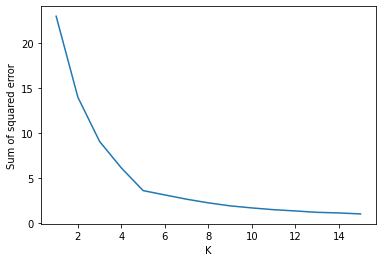

In [ ]:
#Creamos una lista para guardar nuestros valores de SSE para un diferente K
sse = []

#Creamos una lista a través de range, con la cual definiremos los posibles valores de K que estudiaremos
k_rng = range(1,16) # Estudiaremos desde el rango K = 1 hasta el rango K = 15

# Vamos a recorrer el modelo con diferentes valores de K a través de un for que correrá a través del rango definido en k_rng
# El valor que k irá tomando será el que está en cada indice de la lista k_rng
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10) # Guardamos el modelo K Means en nuestra variable km y definimos a n_clusters como k
    km.fit(DataFrame[['Annual Income (k$)','Spending Score (1-100)']]) #Ajustamos y predecimos, todo con el comando fit_predict
    sse.append(km.inertia_) #Vamos guardando cada valor de SSE en nuestra lista creada anteriormente

#Veamos como se comportó el modelo en términos de SSE para diferentes K
plt.xlabel('K') # Definimos nuestro eje x como "K"
plt.ylabel('Sum of squared error') # Definimos nuestro eje y como "Sum of squared error"
plt.plot(k_rng,sse) # Ploteamos nuestros valores de k_rng en el eje x y los valores de SSE en el eje y 

In [ ]:
sse # Llamamos a nuestro sse para ver los valores exactos que ha tomado

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.110312266413655,
 3.5831179059525606,
 3.1003435707513756,
 2.624103948396721,
 2.2180573120830713,
 1.8829387456584712,
 1.6513444080300124,
 1.4564146097889132,
 1.3123134374929935,
 1.1601326983344877,
 1.0905821731812533,
 0.9823741024032732]

Considerando las iteraciones, podemos ver como a un K pequeño, el valor del SSE es grande comparado a los demás elementos de la lista, por eso cuando K es igual a 3 no funcionó como esperaba, en cambio, cuando el valor de K es 5, como la curva tiende a cero, hay menos error, pero si seguimos aumentando, los grupos formados dejan de tener sentido nuevamente.

Pero ahora bien, cuando K es alto hay menos error, pero perdemos la identidad de cada Cluster, dandome grupos que no se pueden interpreta

#### ¿Cuál es el mejor modelo?

Viendo las distintas opciones como spending score vs age, annual income vs age o spending score vs annual income, y sus distintas configuraciones de k, el mejor modelo es el spending score vs annual income con un k=5, esto es debido a la facilidad con la cual se le puede dar interpretación(Insight), las similitudes que tienen los datos en sus conjuntos y las diferencias que tienen con los otros grupos, además de tener un balance ideal  entre clusters y SSE, a diferencia de los otros modelos o configuración de k-means.

## Conclusion Final e Insights

A modo de concluir este examen, presentaré los grandes hallazgos que pude fijarme, lo primero, es que a la hora de hacer clusters, es importante un análisis previo para no caer en variables que pueden entorpecer el proceso de desarrollo. También, que las suposiciones de que podríamos obtener pueden ser muy distintas a lo que realmente obtenemos con el código, ya que cuando elegí los 3 clusters, me dio grupos que no esperaba obtener, y que solo me sirvió para rechazar el modelo y preferir otro.

Igualmente podemos concluir que los clusters son un modelo bastante útil, debido a que desde el punto de vista si fuéramos una empresa, empleador, publicista, etc. Hay un montón de puestos o enfoques donde estos serían útiles ya que donde necesitemos segmentar grandes bases de datos que tenemos ya sean de clientes, objetos, etc. Podemos llegar a información bastante útil que no tenemos a simple vista y el modelo ayuda a proyectar en nuestra mente y de esto podemos generar un montón de ideas para nuestros propios fines.
Y como dije anteriormente el uso de estos es bastante flexible dependiendo del enfoque que le queramos dar.


### Aprendizajes

A partir de lo aprendido en clases, pude expandir esta información, para poder analizar tablas de más de dos variables, descomponiéndolas o visualizándolas desde otra perspectiva. 

También integre los conocimientos de Clusters para poder generar el modelo más óptimo teniendo en cuenta la métrica que viene dada por este método y las múltiples herramientas, como  los gráficos, que podrían ser modificados para entender mejor lo que ocurre con los datos, como estrellas, colores, etc.

También la importancia de tener presente los datos reales y normalizados para trabajar, ya que si hubiésemos comenzado normalizando, hubiésemos tenido problema al interpretar los datos, y si no lo hubiéramos hecho nunca, nuestros resultados no tendrían sentido. 


### Sugerencias
* Tener presentes las distintas herramientas que entregan las librerías y poder aprovecharlas al máximo, para apreciar desde distintas perspectivas lo que se hace. 
* Creación de supociones que puedan contribuir a descartar o aceptar posibilidades
* Descartar o cambiar variables que entreguen poca información o confundan la lectura de ellas
* Tener en mente el objetivo que se quiere llegar y no desviarse en las herramientas


### Insights:

#### Cluster K = 5 Spending Score & Annual Income

![Grafico=5](https://i.imgur.com/YbXgiCJ.png)


Viendo la distribución dada  de nuestros clusters si fuéramos una empresa x podríamos definir a nuestro Cluster azul el grupo de High Class de nuestra empresa, debido a que son los clientes que tienen más ingresos y gastan más, también tenemos por otra parte los clientes en amarillo, que gastan más y ganan poco, así mismo, los de color verde, que son mas moderados en lo que gastan y ganan, los rojos, que ganan poco y reciben poco y los negros, que ganan harto, pero gastan poco. Con esto podriamos darle distintos enfoques a nuestra empresa, dependiendo de lo que queramos ofrecer. 

Por esta razón, gracias a esta asignación de Clusters, si fuesemos una empresa tipo casino buscaríamos a los clusters de arriba(Amarillos y azules) debido a que ellos son los que tienden a gastar la mayor parte de sus ingresos independiente de sus ingresos anuales, luego si fuéramos una empresa que vende un producto o un servicio de manera mensual o semestral o anual como Spotify,Netflix, etc. Nos serviría llamar la atención del cluster verde ya que son gente que no tiende a gastar mucho pero igualmente gana un ingreso moderado por lo que serían unos buenos clientes habituales, luego si fuéramos un banco o una empresa relacionada con el ahorro nos serviría el Cluster de abajo(rojo y negro)debido a que este grupo es el que tiende a ahorrar la mayor parte de sus ingresos.

A modo de resumen estos son los Insights que vemos en cada grupo:
- Grupo 0 : Se podría decir que son constantes en los pagos, llamaría atención a empresas de suscripciones temporales de no muy alto costo(Spotify,Netflix,etc.), podriamos decir que es la clase media o el cliente habitual en la mayoría de empresas.

- Grupo 1 : Este grupo podriamos decir que son los "clientes riesgosos" para un tipo de empresa x, por ejemplo no se les aceptaría creditos, etc. Igualmente si vieramos a este grupo de un enfoque más de estado, sería un grupo que tendría mayor facilidad en distintas becas y en acceso a bonos.

- Grupo 2 : Este grupo sería el enfoque de inversionistas, las compañias de seguros y bancos con tal de resguardar los capitales.

- Grupo 3: A este grupo lo denominariamos como la High Class, es un grupo de enfoque ideal para empresas como casinos, propiedades, los bancos proveerían distintas tarjetas(Black,Gold,etc) a este grupo con el fin de que consuman aun más y sigan consumiendo.

- Grupo 4: Grupo al que se le recomendaría ahorrar, probablemente sean consumistas, captadores todo retail  y de ofertas.


 #### Clusters relacionados con Age

Los modelos Clusters relacionados con la edad de los clientes igualmente tendrían mucho Insight, sin embargo nosotros no pudimos llegar a modelos de clara interpretacion con el DataFrame de clientes que teniamos.

Pero igualmente se podrían separar los adultos que gastan más y los que gastan menos, esta separacion sería ideal para empresas de seguros de vida, afp, etc.

Igualmente si vemos esto por el lado de los jovenes en nuestro DataFrame vemos que todos están arriba de los 18 años, entonces si nos enfocamos solamente en este grupo de adultos-jovenes podríamos encontrar a los que están saliendo de la universidad como grupo de enfoque ideal para los bancos por el tema de creditos o inicio de la vida laboral.